In [4]:
# Loading and examining the structure of the uploaded dataset to understand its contents
import pandas as pd

# Load the dataset
file_path = "metaverse_transactions_dataset.csv"
data = pd.read_csv(file_path)

# Display the first few rows and summary information of the dataset
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          78600 non-null  object 
 1   hour_of_day        78600 non-null  int64  
 2   sending_address    78600 non-null  object 
 3   receiving_address  78600 non-null  object 
 4   amount             78600 non-null  float64
 5   transaction_type   78600 non-null  object 
 6   location_region    78600 non-null  object 
 7   ip_prefix          78600 non-null  float64
 8   login_frequency    78600 non-null  int64  
 9   session_duration   78600 non-null  int64  
 10  purchase_pattern   78600 non-null  object 
 11  age_group          78600 non-null  object 
 12  risk_score         78600 non-null  float64
 13  anomaly            78600 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 8.4+ MB


(             timestamp  hour_of_day  \
 0  2022-04-11 12:47:27           12   
 1  2022-06-14 19:12:46           19   
 2  2022-01-18 16:26:59           16   
 3  2022-06-15 09:20:04            9   
 4  2022-02-18 14:35:30           14   
 
                               sending_address  \
 0  0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da   
 1  0xd6e251c23cbf52dbd472f079147873e655d8096f   
 2  0x2e0925b922fed01f6a85d213ae2718f54b8ca305   
 3  0x93efefc25fcaf31d7695f28018d7a11ece55457f   
 4  0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9   
 
                             receiving_address      amount transaction_type  \
 0  0x39f82e1c09bc6d7baccc1e79e5621ff812f50572  796.949206         transfer   
 1  0x51e8fbe24f124e0e30a614e14401b9bbfed5384c    0.010000         purchase   
 2  0x52c7911879f783d590af45bda0c0ef2b8536706f  778.197390         purchase   
 3  0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace  300.838358         transfer   
 4  0x6fdc047c2391615b3facd79b4588c7e9106e49f2  775.569344   

In [8]:
# Import necessary libraries
import pandas as pd
from datetime import datetime
import numpy as np

# Load the dataset (Extract Step)
file_path = "metaverse_transactions_dataset.csv"
data = pd.read_csv(file_path)

# Data Transformation Step
def transform_data(df):
    # Convert timestamp to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    # Handle missing values - replacing with mean or mode depending on column type
    df['amount'].fillna(df['amount'].mean(), inplace=True)
    df['risk_score'].fillna(df['risk_score'].mean(), inplace=True)
    df['transaction_type'].fillna(df['transaction_type'].mode()[0], inplace=True)
    
    # Feature Engineering - Extracting date parts
    df['transaction_date'] = df['timestamp'].dt.date
    df['transaction_month'] = df['timestamp'].dt.month
    df['transaction_day'] = df['timestamp'].dt.day
    df['transaction_hour'] = df['timestamp'].dt.hour
    
    # Adding a 'risk_category' based on risk_score
    df['risk_category'] = pd.cut(df['risk_score'], bins=[0, 20, 40, 60, 80, 100],
                                 labels=['Low', 'Moderate', 'High', 'Very High', 'Critical'])
    return df

# Transform the data
transformed_data = transform_data(data)

# Loading Step: Saving transformed data for further analysis (simulating database load)
transformed_data.to_csv('transformed_metaverse_data.csv', index=False)

# Display the first few rows of transformed data
print(transformed_data.head())

/var/folders/cf/rc6dtt9140gg06v5rfn39f580000gn/T/ipykernel_6983/4259495644.py:16: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/cf/rc6dtt9140gg06v5rfn39f580000gn/T/ipykernel_6983/4259495644.py:17: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

            timestamp  hour_of_day  \
0 2022-04-11 12:47:27           12   
1 2022-06-14 19:12:46           19   
2 2022-01-18 16:26:59           16   
3 2022-06-15 09:20:04            9   
4 2022-02-18 14:35:30           14   

                              sending_address  \
0  0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da   
1  0xd6e251c23cbf52dbd472f079147873e655d8096f   
2  0x2e0925b922fed01f6a85d213ae2718f54b8ca305   
3  0x93efefc25fcaf31d7695f28018d7a11ece55457f   
4  0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9   

                            receiving_address      amount transaction_type  \
0  0x39f82e1c09bc6d7baccc1e79e5621ff812f50572  796.949206         transfer   
1  0x51e8fbe24f124e0e30a614e14401b9bbfed5384c    0.010000         purchase   
2  0x52c7911879f783d590af45bda0c0ef2b8536706f  778.197390         purchase   
3  0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace  300.838358         transfer   
4  0x6fdc047c2391615b3facd79b4588c7e9106e49f2  775.569344             sale   

  locat

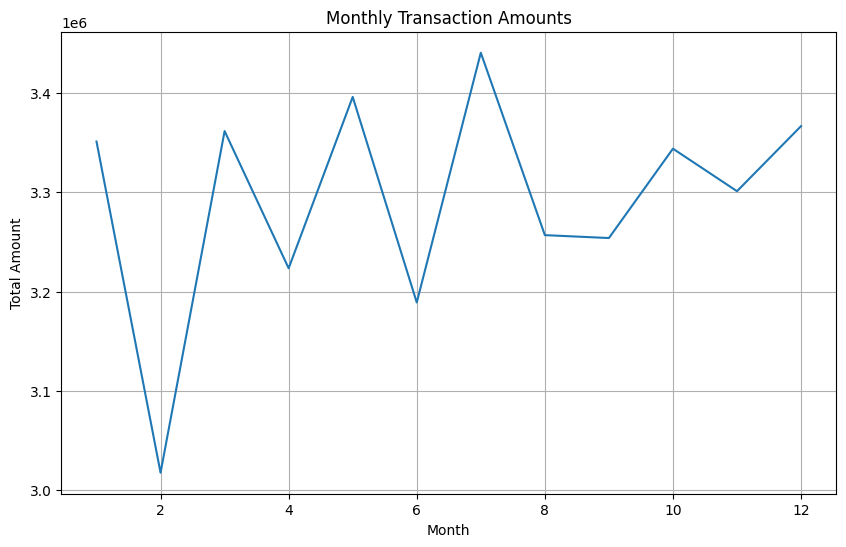

Number of Critical Risk Transactions: 7596
   transaction_date      amount                             sending_address  \
19       2022-06-07  230.214385  0x913bb81a957aec7d0e46c8dfc46f87cdde2e7b59   
26       2022-11-05  851.321088  0x7cb57ac73f0c5a47b4501774b9ef68c26eba852c   
68       2022-11-30    0.010000  0xd03d6a433a903052df6420f3756a79b8cc7aadcd   
80       2022-08-13  303.299117  0x03ebaf3f967767ea31c49025fd6928619ec43afd   
86       2022-01-18  719.112642  0x0ad8484a353ad7e38bb893f8d331d5adbe1b71e5   

                             receiving_address  
19  0x4ec607d0d5683a6e2fa4ca1278205bd81f47ce82  
26  0x50faf31a0864d01e098e833d31e67b0b8154eb05  
68  0x99d8f6c4760a1078c3bceed9e27e397fb488e19a  
80  0xc7bdf2bdc064310896794a9cd1db8eef07ffc32e  
86  0x4bfe6fa35149db081520aea5e503946572718756  


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing transaction trends by month
monthly_transactions = transformed_data.groupby('transaction_month')['amount'].sum().reset_index()

# Plotting the monthly transaction trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_transactions, x='transaction_month', y='amount')
plt.title('Monthly Transaction Amounts')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

# Analyzing high-risk transactions
high_risk = transformed_data[transformed_data['risk_category'] == 'Critical']
print(f"Number of Critical Risk Transactions: {len(high_risk)}")
print(high_risk[['transaction_date', 'amount', 'sending_address', 'receiving_address']].head())

In [10]:
# Handling Outliers using the IQR method
def handle_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the range for acceptable values
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip outliers
    df[column] = df[column].clip(lower_bound, upper_bound)
    return df

# Applying the outlier handling on 'amount' and 'risk_score'
transformed_data = handle_outliers(transformed_data, 'amount')
transformed_data = handle_outliers(transformed_data, 'risk_score')

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Feature selection for prediction
features = transformed_data[['hour_of_day', 'amount', 'login_frequency', 'session_duration']]
target = transformed_data['risk_score']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting risk scores
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error of the Model: {mse:.2f}")

Mean Squared Error of the Model: 247.49


In [12]:
import plotly.express as px

# Visualize transaction amount distribution by risk category
fig = px.box(transformed_data, x='risk_category', y='amount', title='Transaction Amount by Risk Category')
fig.show()

In [13]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Feature selection
features = transformed_data[['transaction_hour', 'amount', 'risk_score']]
target = transformed_data['amount']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize XGBoost model
xgboost_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)

# Train the model
xgboost_model.fit(X_train, y_train)

# Predict on the test set
predictions = xgboost_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error of XGBoost Model: {mae:.2f}")

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/opt/homebrew/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <B9202094-7D52-318C-99CF-7034B0E9F28D> /opt/homebrew/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libomp.dylib' (no such file)"]


In [2]:
import plotly.graph_objects as go

# Plot actual vs. predicted values
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=predictions, mode='markers', name='Predicted vs Actual'))
fig.update_layout(title='Actual vs Predicted Amounts', xaxis_title='Actual Amount', yaxis_title='Predicted Amount')
fig.show()

NameError: name 'y_test' is not defined